# 2 Data wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of Retinopathy Detection Problem](#2.2.1_recap_reti)
    * [2.2.2 Retinopathy Dataset](#2.2.2_reti_dataset)
    * [2.2.3 Introduction To Notebook](#2.2.3_Introduction_To_Notebook)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The messidor Data](#2.5_Load_The_messidor_Data)
  * [2.7 Summary](#2.7_Summary)

## 2.2 Introduction<a id='2.2_Introduction'></a>

The **retina** is part internal of the nerve tissue of the eye that lines the back two-thirds of the organ. Its central region is in charge of the central visiona and the outer layer is in charge of the peripheral vision. All these parts together as one, are responsible for receiving visual images, and it is the first step in decoding the signal. We can think of it as a sensor.

<p style="text-align:center;"><img src="https://www.doctordiegoruizcasas.com/ext/r/800x592-204/el_ojo_humano.jpg" alt="Drawing" style="width: 500px;"/></p>

**Retinopathy** term is used for diseases in general that are localized at the retina. There are several types of retinopathies and most of them affect the small retinal blood vessels and can be diagnosed by using a medical device called ophthalmoscope. 

These diseases can be caused for many reasons, including congenital, hypertension, or any other pathology that can affect small blood vessels. However, the most common type of retinopathy is the one caused by diabetic complications called (non-surprisingly) **Diabetic Retinopathy**.

As subclasses of the disease, we can find **proliferative** and **nonproliferative**. This term refers to the growth of abnormal blood vessels in the retina, being the second one the most dangerous since it can impact the vision of the patient (including blindness in severe cases). Nonproliferative can also derive in proliferative, therefore, regular eye examinations and treatment (when necessary) are important for controlling this disease.

**Diabetes** has reached impressive numbers by 2017, [having almost 425 million people facing the disease and estimating almost 629 million by 2045](https://www.nature.com/articles/s41433-019-0566-0). According to this [article](https://www.asrs.org/patients/retinal-diseases/3/diabetic-retinopathy) from the [American Society of Retina Specialists](https://www.asrs.org/), half of the patients with diabetes and is the number one cause of irreversible blindness in working-age people, but there is substantial scientific evidence that early detection and timely treatment can prevent vision loss.

In recent years, there have been programmes based on the **analysis of fundus photographs** by specially trained ophtalmologists (mostly remote graders). However, although great eyes behind the analysis, the diagnostic accuracy achieved may not be optimal, and scaling and [sustaining such programmes has been found to be challenging](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5733521/). Additionally, the costs of those type od services could be quite high even for developed countries.

**Deep learning**, a machine learning (ML) technique, [has shown promising diagnostic performance in several applications](https://chemport.cas.org/cgi-bin/sdcgi?APP=ftslink&action=reflink&origin=npg&version=1.0&coi=1%3ACAS%3A528%3ADC%2BC2MXht1WlurzP&md5=0114b2ed20ab1840e1c58bd5ab4170b8) such as in image recognition and computer vision tasks. These technologies have been widely adopted in many domains including healthcare and medicine. For medical imaging analysis in general, it has [achieved robust results in various medical specialities](https://pubs.rsna.org/doi/10.1148/radiol.2017162326) such as radiology; for ophthalmology in particular, deep learning (DL) continues the tradition of [autonomous and assisted analysis of retinal photographs](https://www.nature.com/articles/s41433-019-0566-0). Such **artificial intelligence (AI) systems** have been [demonstrated to lower cost, improve diagnostic accuracy, and increase patient access to Diabetic Retinopathy screening](https://www.nature.com/articles/s41433-019-0566-0). Recent works on DL in ophthalmology showcase its potential to at least partially replace human graders, while providing a similar level of accuracy. Nonetheless, being more adopted as a medical-aid systems than a replacement itself.

### 2.2.1 Recap Of Retinopathy Detection Problem<a id='2.2.1_recap_reti'></a>

As we can see in the introduction, Diabetes is a global eye health issue. Given the rising in diabetes prevalence, old population, retinopathy screening can pose a significant challenge even in developed countries. Int he past recent years, artificial intelligence using machine learning and deep learning have been adopted by the scientific community with the purpose of developing automated Diabetic Retinopathy detection algorithms. This project aims to implement one of these technologies using a Convolutional Neural Network using the above explained dataset and technical methodologies. Although many academics have published robust diagnostic performance of the AI algorithms for Diabetic Retinopathy screening, future research is required to address several challenges, for example and clinical deployment model in order to expedite the translation of these novel technologies into the healthcare setting (_text adapted from this [article](https://www.nature.com/articles/s41433-019-0566-0)_).

### 2.2.2 Retinopathy Dataset<a id='2.2.2_reti_dataset'></a>

The dataset consist of 1200 eye fundus color numerical images of the posterior pole. The images and the following information were taken from of the [Messidor database](https://www.adcis.net/en/third-party/messidor/). 

These images were acquired by 3 ophthalmologic departments using a color video 3CCD camera mounted on a Topcon TRC NW6 non-mydriatic retinograph with a 45 degree field of view. Images were captured using 8 bits per color plane at (1440*960), (2240*1488) or (2304*1536) pixels.

800 images were acquired with pupil dilation (one drop of Tropicamide at 0.5%) and 400 without dilation.

The 1200 images are packaged in 3 sets, one per ophthalmologic department. Each set is divided into 4 zipped subsets containing each 100 images in TIFF format and an Excel file with medical diagnoses for each image that will be used for the label identification.

Medical diagnoses
Two diagnoses have been provided by the medical experts for each image:

1. Retinopathy grade
2. Risk of macular edema

**Retinopathy grade**

* 0 (Normal): (μA = 0) AND (H = 0)
* 1: (0 < μA <= 5) AND (H = 0)
* 2: ((5 < μA < 15) OR (0 < H < 5)) AND (NV = 0)
* 3: (μA >= 15) OR (H >=5) OR (NV = 1)

Where

* μA: number of microaneurysms
* H: number of hemorrhages
* NV = 1: neovascularization
* NV = 0: no neovascularization

**Risk of macular edema**
Hard exudates have been used to grade the risk of macular edema.

* 0 (No risk): No visible hard exudate
* 1: Shortest distance between macula and hard exudates > one papilla diameter
* 2: Shortest distance between macula and hard exudates <= one papilla diameter

All images contained in the database were used for making actual clinical diagnoses. To ensure the upmost protection of patient privacy, information that might allow to identify a patient has been discarded. To minimize any further risk of breach of privacy, the use of this database is restricted to individuals or organizations that obtained the database directly from this [website](https://www.adcis.net/en/third-party/messidor/), which was exactly the one used for downloading the .zip files and stored locally on a Windows computer.

Links
Other databases with retinal images are available on the following sites:

Stare project: Retinal color images and results of automatic location of the optic nerve.
[Drive project:](https://grand-challenge.org/api/) Retinal color images and results of automatic segmentation of blood vessels.

Insight on how to use the database and the files in it were taken from this article:

Decencière et al.. Feedback on a publicly distributed database: the Messidor database.
Image Analysis & Stereology, v. 33, n. 3, p. 231-234, aug. 2014. ISSN 1854-5165  available [here](http://www.ias-iss.org/ojs/IAS/article/view/1155) or [here](http://dx.doi.org/10.5566/ias.1155).

### 2.2.3 Introduction To Notebook<a id='2.2.3_Introduction_To_Notebook'></a>

In this notebook, we will be doing step 2 of the Data Science Method (data wrangling). This step focuses on collecting the data, importing it in a suitable way, organizing it, applying basic transformations to it and making sure it's well defined. Paying attention to these tasks will pay off greatly later in our future notebooks.

Some data cleaning will be done at this stage as well so we can understand it better and compute a new and cleaned data set to input our third step (Exploratory Data Analysis). 

At the end of this notebook, we will be selecting some useful features from the tabular data to use based on the statistical analysis made on them and deliver a proper image database for further analysis and, eventually, use it as model inputs.

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
# skimage imports
from skimage import data, color, filters, morphology, graph, measure, exposure
from skimage.filters import threshold_otsu, threshold_local, try_all_threshold, sobel, gaussian
from skimage.transform import rotate, rescale, resize
from skimage.feature import canny
from skimage.io import imsave
# scipy for image
from scipy import ndimage as ndi
# import for file interaction
import os
import io
# imports for reading from zip files
import zipfile
from PIL import Image
# array and data frame imports
import numpy as np
import pandas as pd
# helper functions
import helpers as h
# visualization tools
import matplotlib.pyplot as plt
%matplotlib inline

## 2.4 Objectives<a id='2.4_Objectives'></a>

The following three objectives are considered as the criteria for success in this project:

* [x] Implementing a deep learning algorithm that can successfully detect at least 80% of Diabetic Retinopathy classes (grades).
* [x] Implementing a deep learning algorithm that can successfully detect at least 80% of risk of macular edema.
* [x] Additional to the classifier, implementing an automated pipeline to deploy the model in a productive setting.

## 2.5 Load The Messidor Data<a id='2.5_Load_The_messidor_Data'></a>

We'll start by identifying and reading the zip files in the PATH location where the images and xls label files are stored.

In [2]:
# folder path
dir_path = r'C:\SPRINGBOARD\retinopathy-detection'
# list file and directories
file_names = os.listdir(dir_path+'\data')
display(file_names)

['Base11.zip',
 'Base12.zip',
 'Base13.zip',
 'Base14.zip',
 'Base21.zip',
 'Base22.zip',
 'Base23.zip',
 'Base24.zip',
 'Base31.zip',
 'Base32.zip',
 'Base33.zip',
 'Base34.zip']

Concatenating DataFrame for labels

In [3]:
xls_count = 1
df_total = pd.DataFrame()

for file in file_names:
    # reading the zip files
    if '.zip' in file:
        # reading internal files
        zip_file = zipfile.ZipFile('{}\data\{}'.format(dir_path, file)) 
        for int_file in zip_file.namelist():
            # reading xls files for labels
            if '.xls' in int_file:
                df = pd.read_excel(io.BytesIO(h.read_zip(r'{}\data\{}'.format(dir_path, file), int_file))) # loading excel label files
                df_total = df_total.append(df, ignore_index=True) # appending all xls files
                df_total.drop(columns='Ophthalmologic department', inplace=True)
                print('Excel File {} ready!'.format(xls_count))
                xls_count += 1
df_total.to_csv(r'{}\data_processed\labels.csv'.format(dir_path), index=False) # daving the dataframe to path

Excel File 1 ready!
Excel File 2 ready!
Excel File 3 ready!
Excel File 4 ready!
Excel File 5 ready!
Excel File 6 ready!
Excel File 7 ready!
Excel File 8 ready!
Excel File 9 ready!
Excel File 10 ready!
Excel File 11 ready!
Excel File 12 ready!


Now that we have all .xls files read and concatenated, let's explore the type of variables we have in the data frame and other relevant information.

In [4]:
df_total.head()

Image name  Retinopathy grade  Risk of macular edema 
0  20051019_38557_0100_PP.tif                  3                       1
1  20051020_43808_0100_PP.tif                  0                       0
2  20051020_43832_0100_PP.tif                  1                       0
3  20051020_43882_0100_PP.tif                  2                       0
4  20051020_43906_0100_PP.tif                  3                       2

In [5]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Image name              1200 non-null   object
 1   Retinopathy grade       1200 non-null   int64 
 2   Risk of macular edema   1200 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.2+ KB


Reading tif images from zip files and extracting shapes of each image for reshaping analysis purposes. This is the code we used for generating the dictionary with zip file names as keys and (image sizes, file name) as values:

<p style="text-align:center;"><img src="https://raw.githubusercontent.com/pablo-git8/retinopathy-detection/main/images/getting_imge_sizes.jpg" alt="Code1" style="width: 800px;"/></p>

Then this code was used for appending the name of the zip files to each row (name of tif files) and saving the data frame into a reusable (loadable) csv file. The name of the csv file is img_sizes.csv

<p style="text-align:center;"><img src="https://raw.githubusercontent.com/pablo-git8/retinopathy-detection/main/images/saving_df_img_sizes.jpg" alt="Code1" style="width: 900px;"/></p>

Now let's read the csv file to explore its contents and remove the 'BaseX' string from the file names to add consistency on our data frames

In [6]:
base_df = pd.read_csv('C:/SPRINGBOARD/retinopathy-detection/data_processed/img_sizes.csv')

In [7]:
base_df.head() # exploring the base_df

File Name       Image Size    Zip File
0  Base11/20051019_38557_0100_PP.tif  (1488, 2240, 3)  Base11.zip
1  Base11/20051020_43808_0100_PP.tif  (1488, 2240, 3)  Base11.zip
2  Base11/20051020_43832_0100_PP.tif  (1488, 2240, 3)  Base11.zip
3  Base11/20051020_43882_0100_PP.tif  (1488, 2240, 3)  Base11.zip
4  Base11/20051020_43906_0100_PP.tif  (1488, 2240, 3)  Base11.zip

In [8]:
base_df['Image name'] = base_df['File Name'].apply(lambda x: h.remove_base_x(x)) # removing 'BaseX' string from File name
base_df.drop(columns=['File Name'], inplace=True) # column no longer needed for identification
base_df = h.swap_columns(base_df, 'Image name', 'Image Size') # putting image name in the first column

In [9]:
base_df.head() # exploring the base_df modified

Image name    Zip File       Image Size
0  20051019_38557_0100_PP.tif  Base11.zip  (1488, 2240, 3)
1  20051020_43808_0100_PP.tif  Base11.zip  (1488, 2240, 3)
2  20051020_43832_0100_PP.tif  Base11.zip  (1488, 2240, 3)
3  20051020_43882_0100_PP.tif  Base11.zip  (1488, 2240, 3)
4  20051020_43906_0100_PP.tif  Base11.zip  (1488, 2240, 3)

In [10]:
base_df.tail()

Image name    Zip File       Image Size
1195  20051208_41318_0400_PP.tif  Base34.zip  (1536, 2304, 3)
1196  20051208_41373_0400_PP.tif  Base34.zip  (1536, 2304, 3)
1197  20051208_41570_0400_PP.tif  Base34.zip  (1536, 2304, 3)
1198  20051208_41707_0400_PP.tif  Base34.zip  (1536, 2304, 3)
1199  20051208_42314_0400_PP.tif  Base34.zip  (1536, 2304, 3)

For sanity check, let's explore the information of this data frame 

In [11]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image name  1200 non-null   object
 1   Zip File    1200 non-null   object
 2   Image Size  1200 non-null   object
dtypes: object(3)
memory usage: 28.2+ KB


Good. Now that we have this infomration available, let's join the two data frames into one so we can have it all together for future analysis.

In [12]:
img_labels_sizes = pd.merge(base_df, df_total, how='inner', on='Image name') # merging the two data frames

Again, let's explore the information at the merged dataframe and confirm that we, in fact, have 1200 rows

In [13]:
img_labels_sizes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Image name              1200 non-null   object
 1   Zip File                1200 non-null   object
 2   Image Size              1200 non-null   object
 3   Retinopathy grade       1200 non-null   int64 
 4   Risk of macular edema   1200 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 56.2+ KB


In [14]:
img_labels_sizes.to_csv(r'{}\data_processed\labels_sizes.csv'.format(dir_path), index=False) # saving the final tabular dataset

Now that we have our tabular data ready, it is time to start with the images and provide an uncompressed image database for our next stage 03 (Exploratory Data Analysis).

One crucial feature that our data needs to have for future step in modeling stages is an homogeneous sizes. Therefore, this uncompressed database is going to have the recopilation of .tif images in one same size. This is going to be our benchmark image database since it will keep the original color and RGB features (no image processing nor operations).

However, before doing so, we need to confirm how many image sizes we have so we can apply a re-shaping operation in a correct way. 

In [15]:
set(list(img_labels_sizes['Image Size'])) # unique sizes of all images in zip files

{'(1488, 2240, 3)', '(1536, 2304, 3)', '(960, 1440, 3)'}

In [16]:
# taking 3 images from different files with different sizes
img_nparray1 = plt.imread('20051020_43808_0100_PP.tif') # (1488, 2240, 3) Base11.zip

zip_file = zipfile.ZipFile('{}\data\{}'.format(dir_path, 'Base31.zip')) # (1536, 2304, 3) Base31.zip
ifile = zip_file.open('20051116_44482_0400_PP.tif')
img_nparray2 = np.asarray(Image.open(ifile))

zip_file = zipfile.ZipFile('{}\data\{}'.format(dir_path, 'Base21.zip')) # (960, 1440, 3) Base21.zip
ifile = zip_file.open('20060407_41937_0200_PP.tif')
img_nparray3 = np.asarray(Image.open(ifile))

print(img_nparray1.shape)
print(img_nparray2.shape)
print(img_nparray3.shape)

(1488, 2240, 3)
(1536, 2304, 3)
(960, 1440, 3)


We have three different image sizes

* (1488, 2240, 3)
* (1453, 2304, 3)
* (960, 1449, 3)

So we must come up with a reduced size that can fit all these three. One that can be used is **(372, 560, 3)**, so let's stick to that.

Since we have been already using the same code snipet for a couple of that, it is time to make use of our helper function to perform the reading of each file and doing a specific type of operation, this is basicslly what we are doing with the helper function:

<p style="text-align:center;"><img src="https://raw.githubusercontent.com/pablo-git8/retinopathy-detection/main/images/helper_read_func.jpg" alt="Code1" style="width: 700px;"/></p>

So, let's call it to do a reshape on the images and save them on our working directory!

In [ ]:
h.parse_images(file_names=file_names, dir_path=dir_path, op='original')

In [ ]:
for file in file_names:
    # reading the zip files
    if '.zip' in file:
        # reading internal files
        zip_file = zipfile.ZipFile('{}\data\{}'.format(dir_path, file))
        for int_file in zip_file.namelist():
            # reading tif files
            if '.tif' in int_file:
                ifile = zip_file.open(int_file)
                img_nparray = np.asarray(Image.open(ifile)) # converting them to np.arrays
                ### PROCESSING FUNCTION TO USE FOR EACH CALL SPECIFIED BY USER
        print('{} file read!'.format(file))

In [ ]:
# Set proportional height so its half its size
height = 372 # 744 372
width = 560 # 1120 560

# Resize using the calculated proportional height and width
image_resized = resize(img_nparray3, (height, width),
                       anti_aliasing=True)

# Show the original and resized image
h.show_image(img_nparray3, 'Original')
h.show_image(image_resized, 'Resized image')

img_gray = color.rgb2gray(image_resized)
h.show_image(img_gray, title='Gray Scale')

In [ ]:
####### IMPLEMENTING HELPER FUNCTIONS

In [ ]:
def read_images():
    pass

def resizing(img):
    # Set proportional height so its half its size
    height = int(img.shape[0] / value) # Value to use
    width = int(img.shape[1] / value) # Value to use
    # Resize using the calculated proportional height and width
    return resize(img, (height, width), anti_aliasing=True)
    
def processing(img, processing='original'):
    
    if processing == 'original':
        return resizing(img)
    
    elif processing == 'thesh_vessels':
        # Thresholding vesselness
        return resizing(img)
    
    elif processing == 'sato_vessels':
        # Sato vesselness
        return resizing(img)
    
    elif processing == 'customized':
        # Customized filter
        return resizing(img)
    
def check_image_sizes:
    
    return img_sizes

In [ ]:
########################

## Plenty of work to be done below ##

########################

## 2.7 Summary<a id='2.7_Summary'></a>

# Approach for Data Intake and Processing Operations

Using plt reading and numpy, skimage for operations

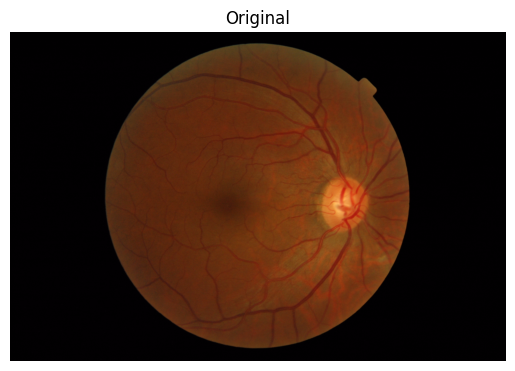

<class 'numpy.ndarray'> (1488, 2240, 3)


In [17]:
img_nparray = plt.imread('20051020_43808_0100_PP.tif')
#img_nparray = np.asarray(img)
h.show_image(img_nparray, title='Original')

## Operations

### Flipping Images

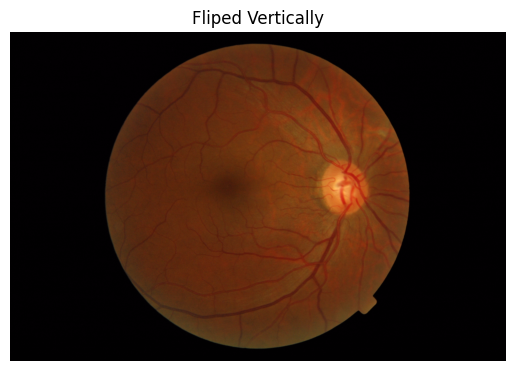

<class 'numpy.ndarray'> (1488, 2240, 3)


In [18]:
img_flipud = np.flipud(img_nparray)
img_fliplr = np.fliplr(img_nparray)
h.show_image(img_flipud, title='Fliped Vertically') # fliplr to flip horizontally

### Convert to Gray Scale

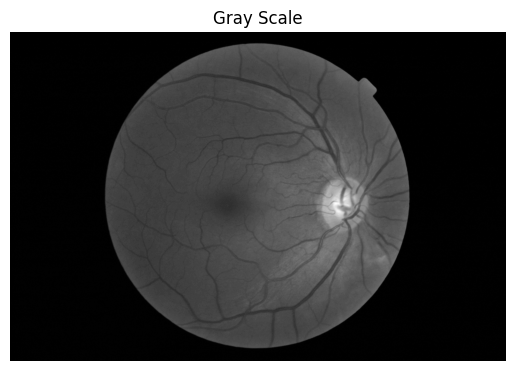

<class 'numpy.ndarray'> (1488, 2240)


In [19]:
img_gray = color.rgb2gray(img_nparray)
h.show_image(img_gray, title='Gray Scale')

### RGB Channels (Histograms)

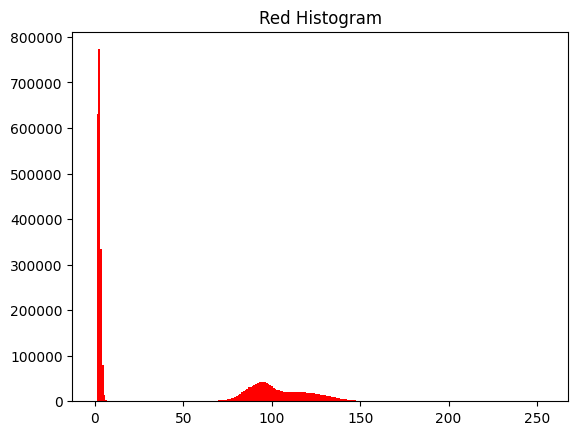

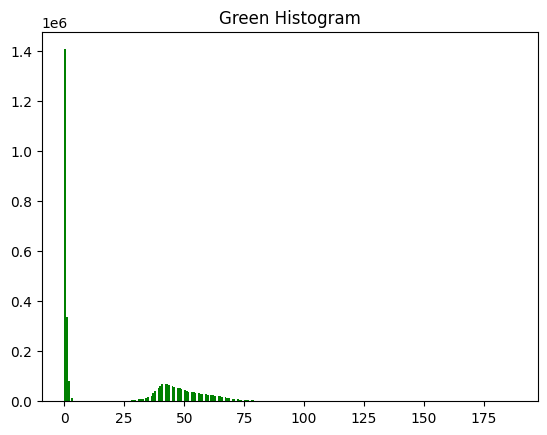

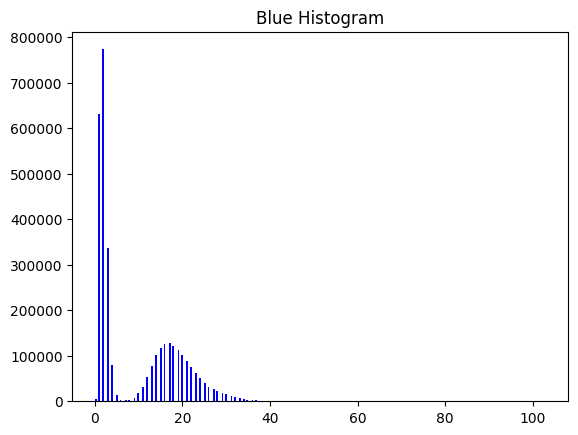

In [20]:
# Getting the RGB channels from the image
red_channel = img_nparray[:, :, 0] # Obtain the red channel
green_channel = img_nparray[:, :, 1] # Obtain the green channel
blue_channel = img_nparray[:, :, 2] # Obtain the blue channel

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256, color='red')
# Set title and show
plt.title('Red Histogram')
plt.show()

# Plot the green histogram with bins in a range of 256
plt.hist(green_channel.ravel(), bins=256, color='green')
plt.title('Green Histogram')
plt.show()

# Plot the blue histogram with bins in a range of 256
plt.hist(blue_channel.ravel(), bins=256, color='blue')
plt.title('Blue Histogram')
plt.show()

## Thresholding

### Binary Image

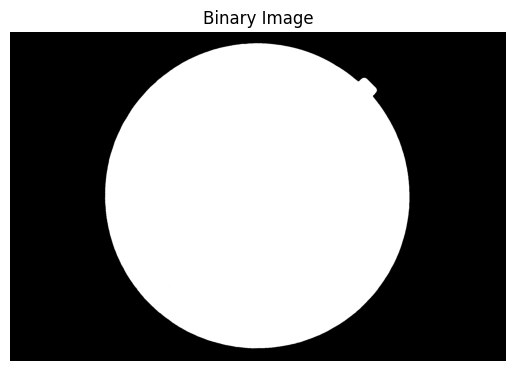

<class 'numpy.ndarray'> (1488, 2240)


In [21]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(img_gray)
# Apply thresholding to the image
binary = img_gray > thresh
# Show the image
h.show_image(binary, 'Binary Image')

### Global Thresholding

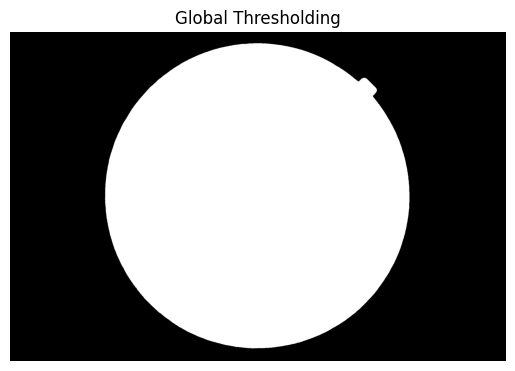

<class 'numpy.ndarray'> (1488, 2240)


In [22]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(img_gray)
# Obtain the binary image by applying global thresholding
binary_global = img_gray > global_thresh
# Show the binary image obtained
h.show_image(binary_global, 'Global Thresholding')

### Local Thresholding

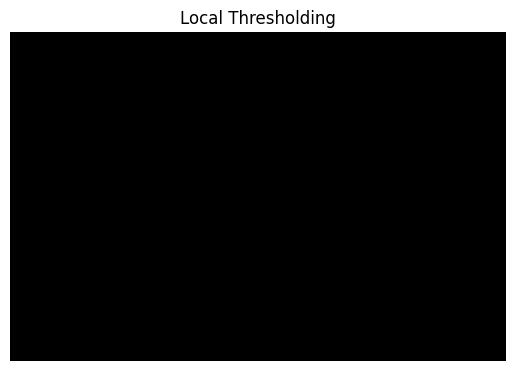

<class 'numpy.ndarray'> (1488, 2240)


In [23]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Set the block size to 35
block_size = 35
# Obtain the optimal local thresholding
local_thresh = threshold_local(img_gray, block_size, offset=10)
# Obtain the binary image by applying local thresholding
binary_local = img_gray > local_thresh
# Show the binary image
h.show_image(binary_local, 'Local Thresholding')

### Trying All Thresholds

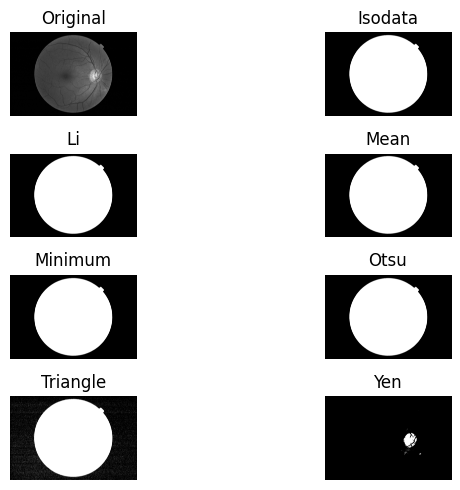

In [24]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(img_gray, verbose=False)
# Show the resulting plots
plt.show()

## Filtering

### Edge Detection

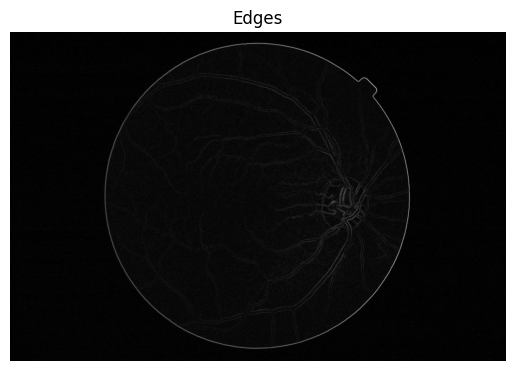

<class 'numpy.ndarray'> (1488, 2240)


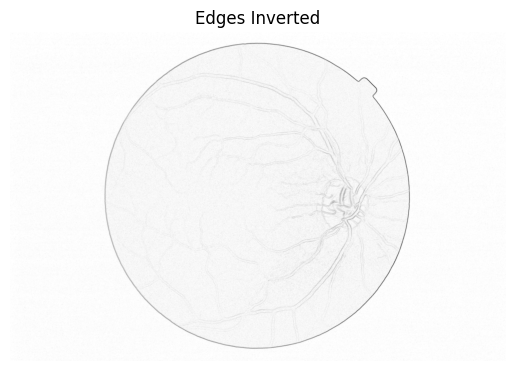

<class 'numpy.ndarray'> (1488, 2240)


In [25]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
img_edges = sobel(img_gray)
# Show the edge image
h.show_image(img_edges, 'Edges')
# Show the edge image inverted
h.show_image(img_edges, title='Edges Inverted', cmap_type="gist_yarg")

### Blurring to Reduce Noise

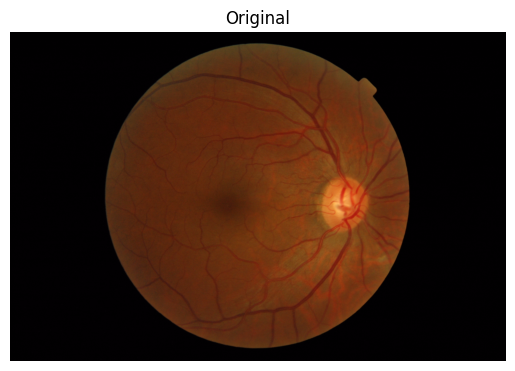

<class 'numpy.ndarray'> (1488, 2240, 3)


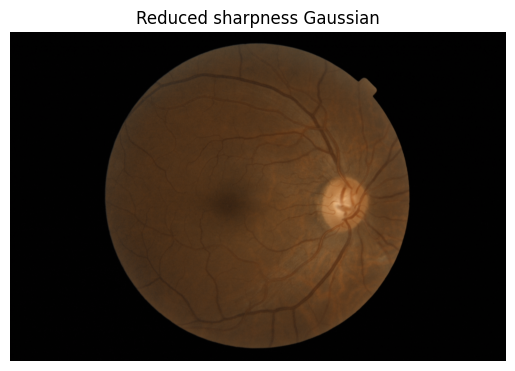

<class 'numpy.ndarray'> (1488, 2240, 3)


In [26]:
gaussian_image = gaussian(img_nparray, channel_axis=True)
h.show_image(img_nparray, "Original")
h.show_image(gaussian_image, "Reduced sharpness Gaussian")

### Contrast Enhancement

Measure of its dynamic range or the spread of its histogram. Contrast enhancement can be done by usinf the **contrast stretching techniques** which is used to stretch the histogram so the full range of intensity values is filled. The other technique used is **histogram equalization** that spreads out the most frequent histogram intensities values using probability distribution. There are three types of histogram equalization:

1. **Standard Histogram Equalization:** Increasing overall contrast
2. **Adaptive Histogram Equalization:** This method computes several histograms, each corresponding to a distinct region of the image, and use them to redistribute the lightest values of the image histogram
3. **Contrast Limited Adaptive HE (CLAHE):** This is similar to 2 but it softeness the noise in the image since it is not taking the global histogram but operates in small regions.

#### Standard Histogram Equalization

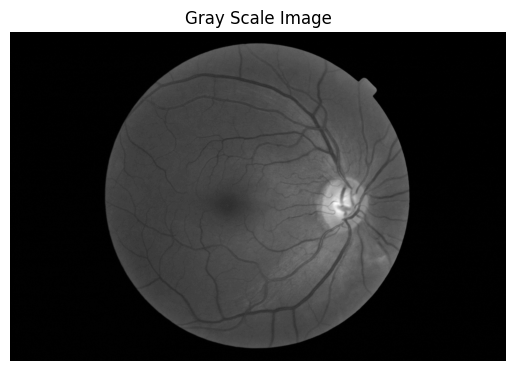

<class 'numpy.ndarray'> (1488, 2240)


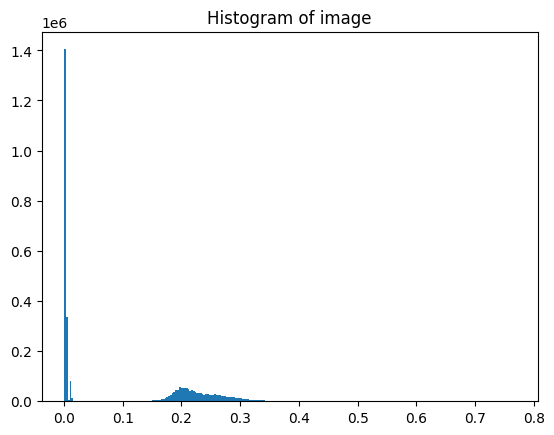

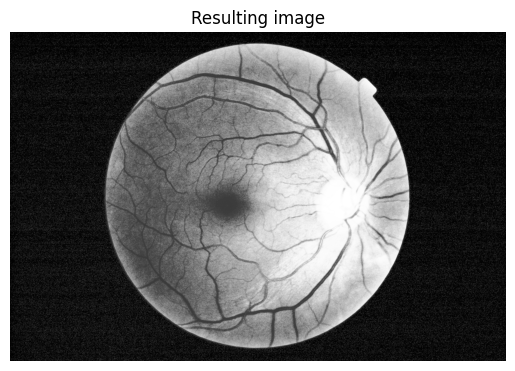

<class 'numpy.ndarray'> (1488, 2240)


In [27]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Show original x-ray image and its histogram
h.show_image(img_gray, 'Gray Scale Image')

# histogram
plt.title('Histogram of image')
plt.hist(img_gray.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
img_hist_eq = exposure.equalize_hist(img_gray)
# Show the resulting image
h.show_image(img_hist_eq, 'Resulting image')

#### CLAHE

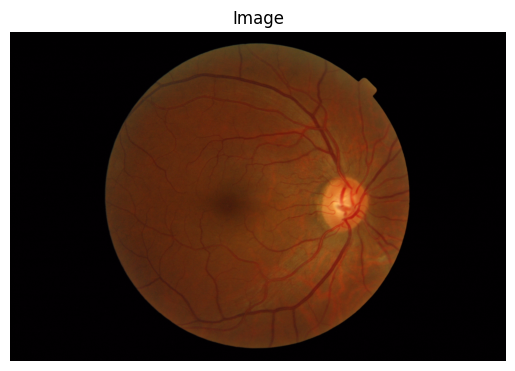

<class 'numpy.ndarray'> (1488, 2240, 3)


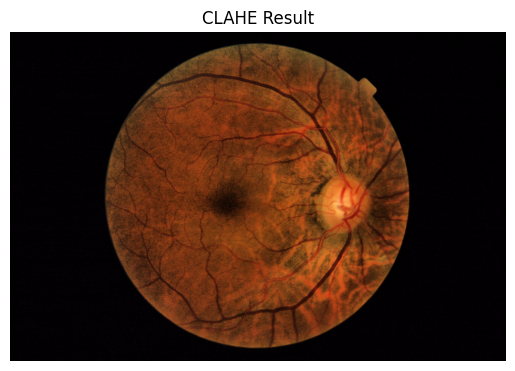

<class 'numpy.ndarray'> (1488, 2240, 3)


In [28]:
# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(img_nparray, clip_limit=0.02)

# Compare the original image to the equalized
h.show_image(img_nparray)
h.show_image(adapthist_eq_image, 'CLAHE Result')

### Hysteresis Thresholding

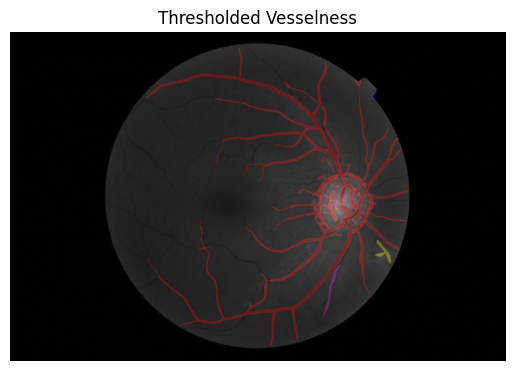

In [29]:
# Hysteresis Thresholding
retina = color.rgb2gray(img_nparray)
t0, t1 = filters.threshold_multiotsu(retina, classes=3)
mask = (retina > t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask

thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)
labeled = ndi.label(thresholded)[0]

_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()
_ = ax.set_title('Thresholded Vesselness')

### Applying the Vesselness Filter

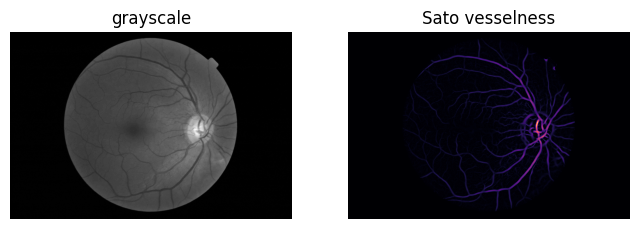

In [30]:
retina = color.rgb2gray(img_nparray)
t0, t1 = filters.threshold_multiotsu(retina, classes=3)
mask = (retina > t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,8))
axes[0].imshow(retina, cmap='gray')
axes[0].set_axis_off()
axes[0].set_title('grayscale')
axes[1].imshow(vessels, cmap='magma')
axes[1].set_axis_off()
_ = axes[1].set_title('Sato vesselness')

### Skelotonize

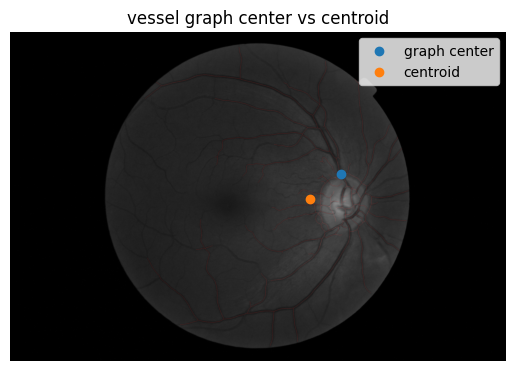

In [31]:
largest_nonzero_label = np.argmax(np.bincount(labeled[labeled > 0]))
binary = labeled == largest_nonzero_label
skeleton = morphology.skeletonize(binary)
g, nodes = graph.pixel_graph(skeleton, connectivity=2)
px, distances = graph.central_pixel(
        g, nodes=nodes, shape=skeleton.shape, partition_size=100
        )

centroid = measure.centroid(labeled > 0)

_, ax = plt.subplots()
ax.imshow(color.label2rgb(skeleton, retina))
ax.scatter(px[1], px[0], label='graph center')
ax.scatter(centroid[1], centroid[0], label='centroid')
ax.legend()
ax.set_axis_off()
ax.set_title('vessel graph center vs centroid')

plt.show()

## Transformations

### Reducing with Antialiasing

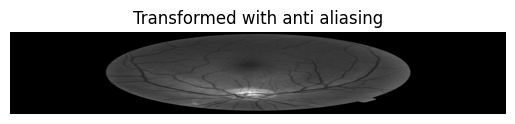

<class 'numpy.ndarray'> (372, 2240, 1)


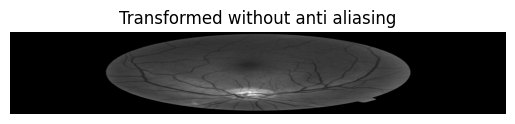

<class 'numpy.ndarray'> (372, 2240, 1)


In [32]:
# Rotate the image 90 degrees clockwise 
rotated_img = rotate(img_nparray, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_img, 1/4, anti_aliasing=True, channel_axis=True)

# Rescale without anti aliasing
rescaled_without_aa = rescaled_with_aa = rescale(rotated_img, 1/4, anti_aliasing=False, channel_axis=True)

# Show the resulting images
h.show_image(rescaled_with_aa, "Transformed with anti aliasing")
h.show_image(rescaled_without_aa, "Transformed without anti aliasing")

### Enlarging Images

In [33]:
# Enlarge the image so it is 3 times bigger
enlarged_img = rescale(img_nparray, 1, anti_aliasing=True, channel_axis=True)

# Show original and resulting image
#h.show_image(img_nparray)
#h.show_image(enlarged_img, "3 times enlarged image")

### Proportionally Resizing

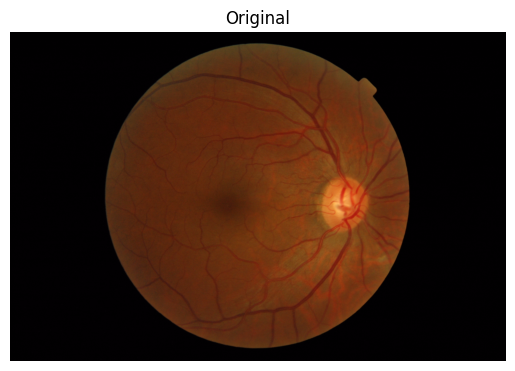

<class 'numpy.ndarray'> (1488, 2240, 3)


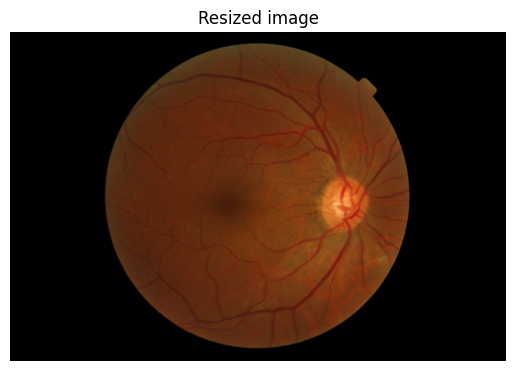

<class 'numpy.ndarray'> (744, 1120, 3)


In [34]:
# Set proportional height so its half its size
height = int(img_nparray.shape[0] / 2)
width = int(img_nparray.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(img_nparray, (height, width),
                       anti_aliasing=True)

# Show the original and resized image
h.show_image(img_nparray, 'Original')
h.show_image(image_resized, 'Resized image')

## Morphology

Basic Morphological Operations Include:

1. **Dilation:** Adds pixels to the boundaries of the objects in an image
2. **Erotion:** Removes pixels on object's boundaries

The number of pixels added or removed on an image depends on the size and shape of a structuring element used to process the image (like a kernel).

### Erosion

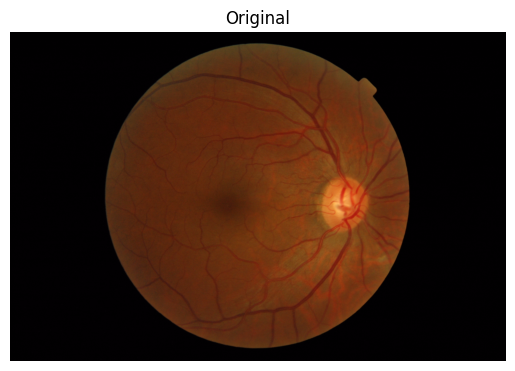

<class 'numpy.ndarray'> (1488, 2240, 3)


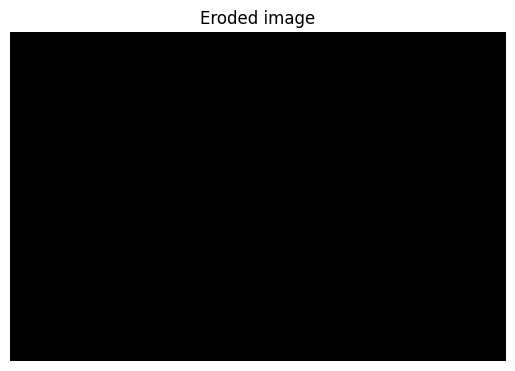

<class 'numpy.ndarray'> (1488, 2240)


In [35]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the eroded shape 
eroded_image_shape = morphology.binary_erosion(img_gray) 

# See results
h.show_image(img_nparray, 'Original')
h.show_image(eroded_image_shape, 'Eroded image')

### Dilation

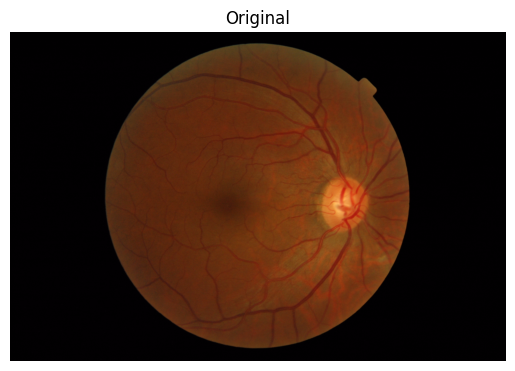

<class 'numpy.ndarray'> (1488, 2240, 3)


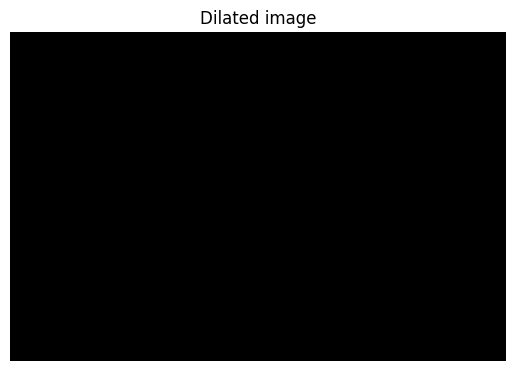

<class 'numpy.ndarray'> (1488, 2240)


In [36]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the dilated image 
dilated_image = morphology.binary_dilation(img_gray)

# See results
h.show_image(img_nparray, 'Original')
h.show_image(dilated_image, 'Dilated image')

## Segmentation

The goal is to change the representation into something more meaningful and easier to analyze by increasing computational efficiency, the segmentation is done by using superpixels. Thresholding is the simplest method for segmentation.

**Superpixel:** group of connected pixels with similar color or gray levels

Segmentation can be done in a supervised or unsupervised way. Supervised being when prior information like threshold values is provided before the segmentation. Unsupervised is when there is no information given, for doing unsupervised we can apply a KNN-like model in the image to get some features from the image.

For this project however, segmentation will be only required for computational purposes since it sould harm the resolution of the vessels in the image (objects of interest).

## Contours

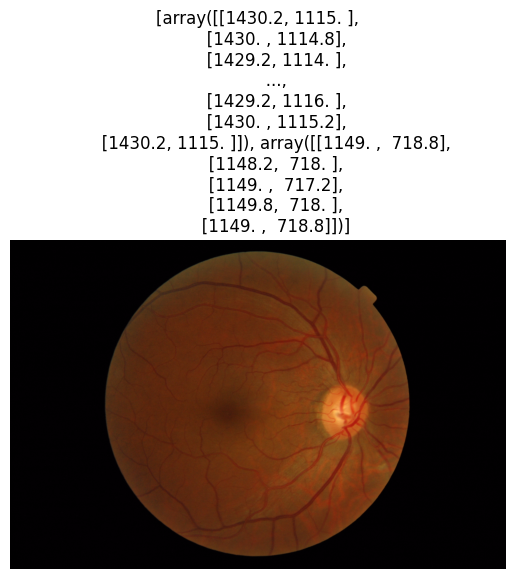

<class 'numpy.ndarray'> (1488, 2240, 3)


In [37]:
# Make the image grayscale using rgb2gray
img_gray = color.rgb2gray(img_nparray)
# Obtain the optimal thresh value
thresh = filters.threshold_otsu(img_gray)
# Apply thresholding
binary = img_gray > thresh
# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)
# Show the image
h.show_image(img_nparray, contours)

## Detecting Edges

The Canny edge detection is the standar edge detection technique in image processing that produces high accuracy in detection edges and less execution time. The goal is to detecte edges in the image and highlight them with thicker lines for spotting them more accurately. 

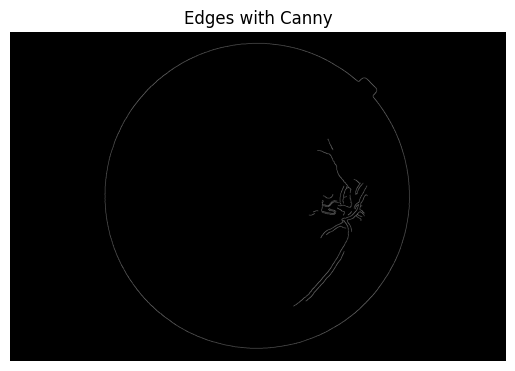

<class 'numpy.ndarray'> (1488, 2240)


In [38]:
# Convert image to grayscale
img_gray = color.rgb2gray(img_nparray)
# Apply canny edge detector
canny_edges = canny(img_gray)
# Show resulting image
h.show_image(canny_edges, "Edges with Canny")

### Less or More Edgy

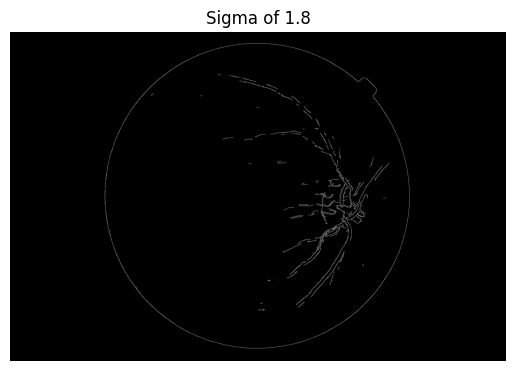

<class 'numpy.ndarray'> (1488, 2240)


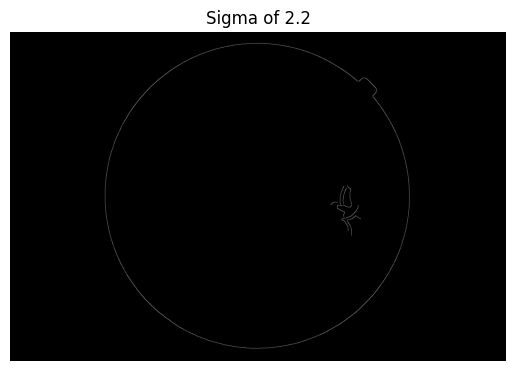

<class 'numpy.ndarray'> (1488, 2240)


In [39]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(img_gray, sigma=0.002)
# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(img_gray, sigma=2.2)
# Show resulting images
h.show_image(edges_1_8, "Sigma of 1.8")
h.show_image(edges_2_2, "Sigma of 2.2")

### Summary of Operations / Transformations / Morphology

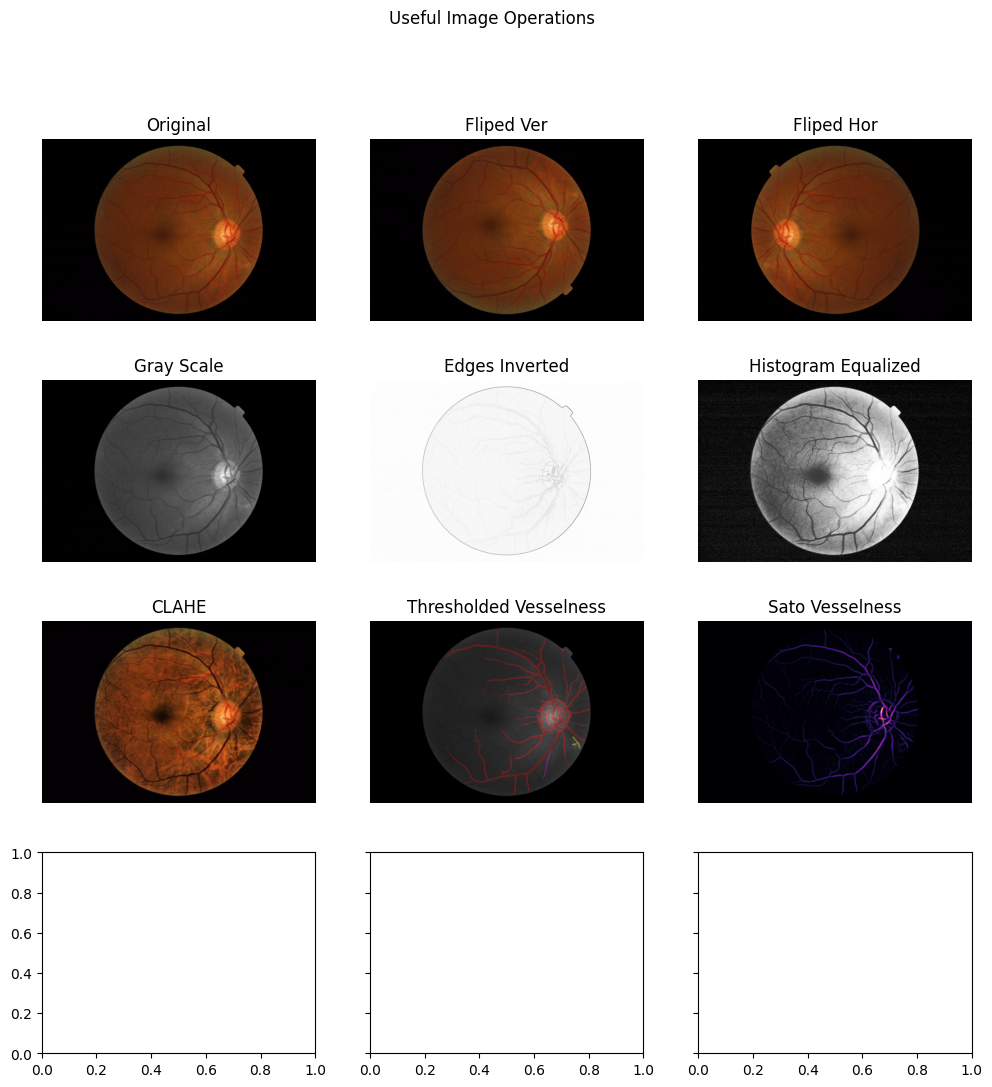

In [40]:
# setting different parameters to adjust each grid
fig, axs = plt.subplots(4, 3, figsize=(12,12))
#fig.tight_layout()
fig.suptitle('Useful Image Operations')

axs[0,0].imshow(img_nparray, cmap='gray')
axs[0,0].set_axis_off()
axs[0,0].set_title('Original')

axs[0,1].imshow(img_flipud, cmap='gray')
axs[0,1].set_axis_off()
axs[0,1].set_title('Fliped Ver')

axs[0,2].imshow(img_fliplr, cmap='gray')
axs[0,2].set_axis_off()
axs[0,2].set_title('Fliped Hor')

axs[1,0].imshow(img_gray, cmap='gray')
axs[1,0].set_axis_off()
axs[1,0].set_title('Gray Scale')

axs[1,1].imshow(img_edges, cmap="gist_yarg")
axs[1,1].set_axis_off()
axs[1,1].set_title('Edges Inverted')

axs[1,2].imshow(img_hist_eq, cmap='gray')
axs[1,2].set_axis_off()
axs[1,2].set_title('Histogram Equalized')

axs[2,0].imshow(adapthist_eq_image)
axs[2,0].set_axis_off()
axs[2,0].set_title('CLAHE')

axs[2,1].imshow(color.label2rgb(labeled, retina))
axs[2,1].set_axis_off()
axs[2,1].set_title('Thresholded Vesselness')

axs[2,2].imshow(vessels, cmap='magma')
axs[2,2].set_axis_off()
axs[2,2].set_title('Sato Vesselness')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()